#Connect to Kaggle & Export Dataset


In [ ]:
 ! pip install -q kaggle

In [ ]:
#upload the kaggle json API token here
from google.colab import files

files.upload()

In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'xhlulu/140k-real-and-fake-faces'

100% 3.74G/3.75G [00:31<00:00, 165MB/s]
100% 3.75G/3.75G [00:31<00:00, 127MB/s]


In [ ]:
#unzipping the folder
!unzip -q 140k-real-and-fake-faces.zip

In [ ]:
#delete the zip file as it is not needed anymore
!rm 140k-real-and-fake-faces.zip

# **Exploratory Data Analysis**

In [ ]:
import os
from tensorflow.keras.utils import load_img
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("RdBu")

***No. of samples Images in each directory***

In [ ]:
path = '/content/real_vs_fake/real-vs-fake'

In [ ]:
classes = ['fake','real']

In [ ]:
for data_dir in os.listdir(path):
  print(data_dir,end='\n')
  for img_class in classes:
    print('no. of {} images: {}'.format(img_class,len(os.listdir('{}/{}/{}'.format(path,data_dir,img_class)))))
  print()

valid
no. of fake images: 10000
no. of real images: 10000

test
no. of fake images: 10000
no. of real images: 10000

train
no. of fake images: 50000
no. of real images: 50000



In [ ]:
train_csv = pd.read_csv('/content/train.csv')
val_csv = pd.read_csv('/content/valid.csv')
test_csv = pd.read_csv('/content/test.csv')

In [ ]:
train_csv.sample(5)

,Unnamed: 0,original_path,id,label,label_str,path
25013,25013,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,20489,1,real,train/real/20489.jpg
42732,42732,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,33873,1,real,train/real/33873.jpg
92405,42405,/kaggle/input/1-million-fake-faces/1m_faces_08...,1BTU0U8ZDP,0,fake,train/fake/1BTU0U8ZDP.jpg
34482,34482,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,31110,1,real,train/real/31110.jpg
51957,1957,/kaggle/input/1-million-fake-faces/1m_faces_04...,TPVBD8XCAD,0,fake,train/fake/TPVBD8XCAD.jpg


In [ ]:
val_csv.sample(5)

,Unnamed: 0,original_path,id,label,label_str,path
18796,8796,/kaggle/input/1-million-fake-faces/1m_faces_08...,38HGBS2EGX,0,fake,valid/fake/38HGBS2EGX.jpg
2638,2638,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,42721,1,real,valid/real/42721.jpg
6359,6359,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,66746,1,real,valid/real/66746.jpg
7205,7205,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,49043,1,real,valid/real/49043.jpg
15602,5602,/kaggle/input/1-million-fake-faces/1m_faces_00...,L470RA5OHZ,0,fake,valid/fake/L470RA5OHZ.jpg


In [ ]:
test_csv.sample(5)

,Unnamed: 0,original_path,id,label,label_str,path
13992,3992,/kaggle/input/1-million-fake-faces/1m_faces_04...,63V73VZI3A,0,fake,test/fake/63V73VZI3A.jpg
715,715,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,28142,1,real,test/real/28142.jpg
12620,2620,/kaggle/input/1-million-fake-faces/1m_faces_04...,GIMEVM39L4,0,fake,test/fake/GIMEVM39L4.jpg
10540,540,/kaggle/input/1-million-fake-faces/1m_faces_04...,H2WS3UYCFM,0,fake,test/fake/H2WS3UYCFM.jpg
13893,3893,/kaggle/input/1-million-fake-faces/1m_faces_00...,M33XYEH8HO,0,fake,test/fake/M33XYEH8HO.jpg


In [ ]:
data_csv = [train_csv,val_csv,test_csv]

In [ ]:
train_csv.value_counts('label_str')

label_str
fake    50000
real    50000
dtype: int64

In [ ]:
no_of_fake_images =0
no_of_real_images = 0
for csv in data_csv:
  no_of_fake_images+=csv.value_counts('label_str')[0]
  no_of_real_images+=csv.value_counts('label_str')[0]

In [ ]:
no_of_fake_images,no_of_fake_images

(70000, 70000)

In [ ]:
import seaborn as sns

In [ ]:
train_csv.value_counts('label_str')

label_str
fake    50000
real    50000
dtype: int64

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(8,8),sharex=True)
sns.countplot(ax=ax[0],y=train_csv["label_str"],orientation="horizontal")
sns.countplot(ax=ax[1],y=val_csv["label_str"],orientation="horizontal")
sns.countplot(ax=ax[2],y=test_csv["label_str"],orientation="horizontal")
ax[0].set(xlabel="Train set",ylabel=None)
ax[1].set(xlabel="Validation set",ylabel=None)
ax[2].set(xlabel="Test dataset",ylabel=None)
fig.suptitle("Number of samples")
plt.show()


NameError: ignored

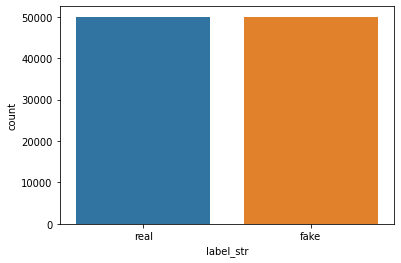

In [ ]:
sns.countplot(x=train_csv["label_str"])
sns.countplot(x=val_csv["label_str"])
sns.countplot(x=test_csv["label_str"])

plt.show()

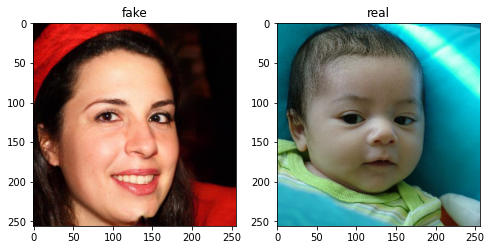

In [ ]:
fig,axes = plt.subplots(1,2,figsize=[8,8])
axes[0].imshow(load_img('/content/real_vs_fake/real-vs-fake/train/fake/001DDU0NI4.jpg'))
axes[0].set_title('fake')
axes[1].imshow(load_img('/content/real_vs_fake/real-vs-fake/train/real/00000.jpg'))
axes[1].set_title('real')
plt.show()

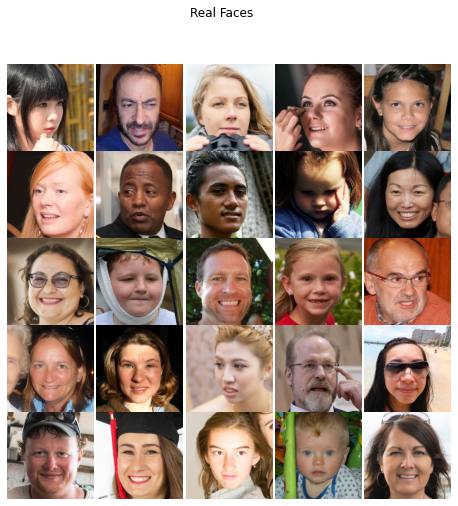

In [ ]:
path = 'real_vs_fake/real-vs-fake'
real_or_fake = 'real'
dir = os.path.join(path, 'train', real_or_fake)
fig, axs = plt.subplots(5,5)
fig.suptitle('Real Faces', fontsize=12)
fig.set_figheight(8)
fig.set_figwidth(8)
k = 25

for i in range(5):
    for j in range(5):
        sample_image = load_img(os.path.join(dir, os.listdir(os.path.join(dir))[k]))
        axs[j,i].imshow(sample_image)
        axs[j,i].axis('off')
        k +=1
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

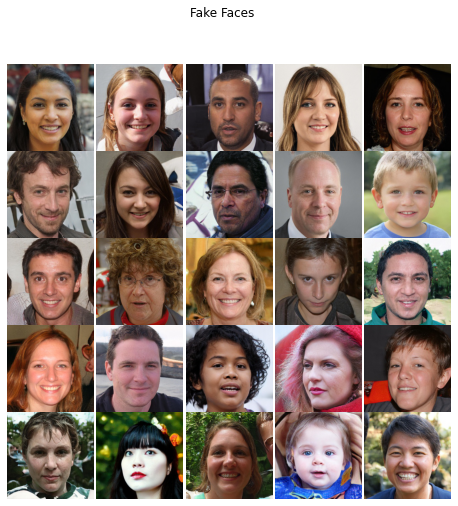

In [ ]:
path = 'real_vs_fake/real-vs-fake'
real_or_fake = 'fake'
dir = os.path.join(path, 'train', real_or_fake)
fig, axs = plt.subplots(5,5)
fig.suptitle('Fake Faces', fontsize=12)
fig.set_figheight(8)
fig.set_figwidth(8)
k = 25

for i in range(5):
    for j in range(5):
        sample_image = load_img(os.path.join(dir, os.listdir(os.path.join(dir))[k]))
        axs[j,i].imshow(sample_image)
        axs[j,i].axis('off')
        k +=1
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

#Data Preprocessing

In [ ]:
#---------------------------The import statments-----------------------------------------

import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already there in tensorflow
from tensorflow.keras.models import Sequential, Model    #To creat the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D  #To create the model
from tensorflow.keras.optimizers import Adam, SGD      #Adam optimizer
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files
from tensorflow.keras.applications import ResNet50, ResNet50V2
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/real_vs_fake/real-vs-fake/train'
val_dir = '/content/real_vs_fake/real-vs-fake/valid'
test_dir = '/content/real_vs_fake/real-vs-fake/test'

image_size = 64
batch_size = 16

In [ ]:
# ######################  Option 1   ###########################

# img_datagen = ImageDataGenerator( rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
#                                   #  rotation_range=40,           #rotate the images
#                                    width_shift_range=0.2,       #fraction of the total width
#                                    height_shift_range = 0.2,    #fraction of the total height
#                                    zoom_range = 0.2,            #float percent
#                                    horizontal_flip=True,        #horizontal flip
#                                    fill_mode='nearest')        #add new pixels when the image is rotated or shifted
# test_datagen = ImageDataGenerator(rescale = 1./255)

######################  Option 2   ###########################

##This was used as preprocessing for the images ran with pretrained models with imageNet weights 

img_datagen = ImageDataGenerator(width_shift_range=0.2,       #fraction of the total width
                                   height_shift_range = 0.2,    #fraction of the total height
                                   zoom_range = 0.2,            #float percent
                                   horizontal_flip=True,        #horizontal flip
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted
test_datagen = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
img_datagen.mean = mean
test_datagen.mean = mean

################################################################
train_generator = img_datagen.flow_from_directory(
                                train_dir,
                                target_size = (image_size, image_size),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                shuffle = True,
                                seed=42)           

validation_generator = img_datagen.flow_from_directory(
                                val_dir,
                                target_size = (image_size, image_size),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                # shuffle=False,               # for coloured images
                                class_mode = 'binary')            # Specify this is training set

test_generator = test_datagen.flow_from_directory(
                                test_dir,
                                target_size = (image_size, image_size),
                                batch_size = batch_size,
                                color_mode="rgb",
                                shuffle=False,               # for coloured images
                                class_mode = 'binary')            # Specify this is training set



Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
#plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

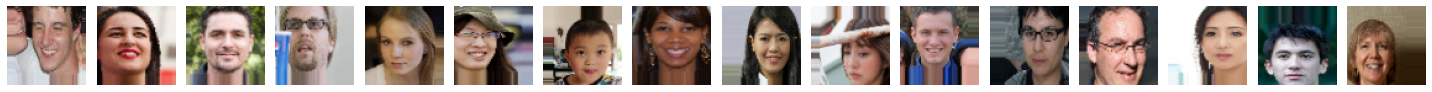

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


In [ ]:
#generate a batch of images and labels from the training set
imgs, labels = next(train_generator)
#displaying example images and thier labels 0 is fake and 1 is for real
plotImages(imgs);
print(labels);

#Building the Model


1. **Rukhiya Nafeesa:** DenseNet architecture (DenseNet121)
2.  **Aysha Asif:** VGGNet architecture (VGG16, VGG19)
3.  **Nadeen Tarek :** ResNet50 architecture
4.  **Pooja Meledath:** & **Ahmad Saad:** Inception
5.  **Rodha Al Marzooqi:** Customized CNN architecture (https://medium.com/@zo2145/deepfake-detection-with-deep-learning-142ed98cbe87#:~:text=The%20Mesonet%20is%20one%20of,as%20Deepfake%27s%20video%2Dcreation%20process)


Reference: https://www.hindawi.com/journals/cin/2021/3111676/ 


### **1. DenseNet**

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
#creating the model
def create_DenseNet_Model():
    densenet = DenseNet121(weights='imagenet',
                           include_top=False,
                           input_shape=(image_size,image_size,3)
                          )
    model = tf.keras.models.Sequential([densenet,
                                        GlobalAveragePooling2D(),
                                        Dense(512, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.3),
                                        Dense(1, activation='sigmoid')
                                      ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return model

densenet121 = create_DenseNet_Model()
densenet121.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                         

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
checkpoint = ModelCheckpoint(filepath='spoffnet.h5',
                            verbose=1,
                                save_best_only=True,
                           mode='min',
                             moniter='val_loss'
                            )
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              verbose=1, 
                              min_delta=0.0001
                             )
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_learning_rate, csv_logger]


In [ ]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history = densenet121.fit(train_generator,
                    validation_data=validation_generator,
                    callbacks=callbacks,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=15
                   )

Epoch 1/15
6250/6250 [==============================] - ETA: 0s - loss: 0.6117 - accuracy: 0.6712
Epoch 1: val_loss improved from inf to 0.65273, saving model to spoffnet.h5
6250/6250 [==============================] - 835s 134ms/step - loss: 0.6117 - accuracy: 0.6712 - val_loss: 0.6527 - val_accuracy: 0.6202 - lr: 0.0010
Epoch 2/15
6250/6250 [==============================] - ETA: 0s - loss: 0.5031 - accuracy: 0.7584
Epoch 2: val_loss did not improve from 0.65273
6250/6250 [==============================] - 809s 129ms/step - loss: 0.5031 - accuracy: 0.7584 - val_loss: 0.6798 - val_accuracy: 0.6715 - lr: 0.0010
Epoch 3/15
6250/6250 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.7890
Epoch 3: val_loss improved from 0.65273 to 0.51943, saving model to spoffnet.h5
6250/6250 [==============================] - 806s 129ms/step - loss: 0.4561 - accuracy: 0.7890 - val_loss: 0.5194 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 4/15
6250/6250 [==============================]

In [ ]:
model_path = "/content/drive/MyDrive/DeepfakeDenseNet121/DenseNet121_without_Dropout_lr_0.001"
spoofnet.save(model_path)
print("Saved model to disk")

Saved model to disk


**MODEL** **EVALUATION**

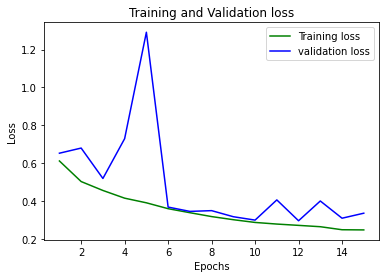

In [ ]:
#Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,16)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

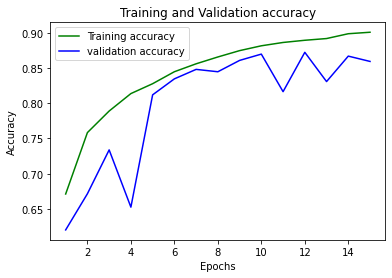

In [ ]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**MODEL** **TESTING**

In [ ]:
loss = densenet121.evaluate(test_generator)

1250/1250 [==============================] - 54s 43ms/step - loss: 0.2797 - accuracy: 0.8871


In [ ]:
predictions = densenet121.predict(test_generator)
print(predictions)
pred_labels = ((predictions > 0.5)+0).ravel() # (n_images,)
print(pred_labels.shape)
print(pred_labels)

1250/1250 [==============================] - 57s 43ms/step
[[4.7429424e-02]
 [3.7712921e-04]
 [2.5357336e-01]
 ...
 [7.9835087e-01]
 [9.4284958e-01]
 [9.9849379e-01]]
(20000,)
[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_recall_curve, classification_report, roc_curve, auc

#Get the confusion matrix
y_test = test_generator.classes

cnf_matrix = confusion_matrix(y_test, pred_labels)
report = classification_report(y_test, pred_labels)
print(cnf_matrix)
print(report)

[[8407 1593]
 [ 664 9336]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     10000
           1       0.85      0.93      0.89     10000

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [ ]:
#Save the classification report
import json

target_labels = ['fake','real']

dict_report = classification_report(y_test, pred_labels, target_names=target_labels, output_dict=True)
print(dict_report)

dir = model_path
with open(dir+'/reports.txt', 'w') as filehandle:
    json.dump(dict_report, filehandle)

{'fake': {'precision': 0.9267996913239995, 'recall': 0.8407, 'f1-score': 0.8816527712233234, 'support': 10000}, 'real': {'precision': 0.8542410101564645, 'recall': 0.9336, 'f1-score': 0.8921592049309571, 'support': 10000}, 'accuracy': 0.88715, 'macro avg': {'precision': 0.890520350740232, 'recall': 0.88715, 'f1-score': 0.8869059880771403, 'support': 20000}, 'weighted avg': {'precision': 0.8905203507402318, 'recall': 0.88715, 'f1-score': 0.8869059880771402, 'support': 20000}}


###**2. VGGNet**

In [ ]:
from keras.applications import  VGG16

In [ ]:
def create_VGG16_model():

  base_model = VGG16(include_top=False, weights='imagenet', input_shape=(image_size,image_size,3))

  for layer in base_model.layers:
    layer.trainable = False
  
  # base_model.trainable = True

  # Get the input and output of the convolutional base.
  my_input = base_model.input
  # my_output = Flatten()(base_model.output) #try to remove flatten

  x_2 = base_model.output
  x_2 = Flatten()(x_2)
 
  x_2 = Dense(16, activation='relu')(x_2)
  x_2 = BatchNormalization()(x_2)
  x_2 = Dense(8, activation='relu')(x_2)
  x_2 = Dropout(0.5)(x_2)
  prediction = Dense(1, activation='sigmoid')(x_2) 
  my_model = Model(inputs=my_input,outputs=prediction) 

  model_name = "VGG16"
  return my_model, model_name

In [ ]:
model_vgg16, model_name = create_VGG16_model()

In [ ]:
model_vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

###**3. ResNet Model**

In [ ]:
#build a resnet model
def create_ResNet_model():

  base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3), pooling='avg')
  
  for layer in base_model.layers:
    layer.trainable = False
  
  # base_model.trainable = True

  # Get the input and output of the convolutional base.
  my_input = base_model.input
  my_output = Flatten()(base_model.output) #try to remove flatten

  # Build the rest of the output layers.
  # Attach a fully connected layer.
  my_output = Dense(units = 512, activation="relu")(my_output)
  my_output = BatchNormalization()(my_output)            
  my_output = Dense(units = 128, activation="relu")(my_output)           
  # Apply dropout.
  # my_output = BatchNormalization()(my_output)
  # my_output = Dropout(rate=0.3)(my_output)
  # my_output = Dense(units = 64, activation="relu")(my_output)           

  # The output layer
  my_output = Dense(units = 1, activation="sigmoid")(my_output)           
  # Finally, use the Functional API to build the model.
  my_model = Model(inputs=my_input,outputs=my_output) 
  

  
  model_name = "ResNet50"
  return my_model, model_name

###**4. Inception**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
#Builds the inception model
def create_Inception_model():

  base_model = Inception(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3), pooling='avg')
  
  for layer in base_model.layers:
    layer.trainable = False
  
  # Get the input and output of the convolutional base.
  my_input = base_model.input
  my_output = Flatten()(base_model.output) #try to remove flatten

  # Build the rest of the output layers.
  # Attach a fully connected layer.
  my_output = Dense(units = 512, activation="relu")(my_output)
  my_output = BatchNormalization()(my_output)            
  my_output = Dense(units = 128, activation="relu")(my_output)                   

  # The output layer
  my_output = Dense(units = 1, activation="sigmoid")(my_output)           
  # Finally, use the Functional API to build the model.
  my_model = Model(inputs=my_input,outputs=my_output) 
  
  model_name = "InceptionV3"
  return my_model, model_name

###**5. Customized CNN Model (MesoNet)**

In [ ]:
#Creating a Sequential Model with customized layers
def create_cnn_model():
  model = Sequential([
                    # input layer with convolutional layer 8x(3x3) + ReLu
                    Conv2D(filters=8, kernel_size=(3,3),activation='relu',padding='same',input_shape=(image_size,image_size,3)),
                    # Batch Normalization
                    BatchNormalization(),
                    # Max Pooling Layer of (2x2)
                    MaxPool2D(pool_size=(2,2)),
                    # Convolutional layer 8x(5x5) + ReLu
                    Conv2D(filters=8, kernel_size=(5,5), activation='relu', padding= 'same'),
                    # Batch Normalization
                    BatchNormalization(),
                    # Max Pooling Layer of (2x2)
                    MaxPool2D(pool_size=(2,2)),
                    # Convolutional layer 16x(5x5) + ReLu
                    Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding= 'same'),
                    # Batch Normalization
                    BatchNormalization(),
                    # Max Pooling Layer of (2x2)
                    MaxPool2D(pool_size=(2,2)),
                    # Convolutional layer 16x(5x5) + ReLu
                    Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding= 'same'),
                    # Batch Normalization
                    BatchNormalization(),
                    # Max Pooling Layer of (4x4)
                    MaxPool2D(pool_size=(4,4)),
                    # Dropout layer with 0.5 rate
                    Dropout(rate=0.5),
                    # Fully connected layer of 16 features
                    Flatten(),
                    Dense(units=16, activation= 'relu'),
                    # Dropout layer with 0.5 rate
                    Dropout(rate=0.5),
                    # Fully connected layer of 1 feature
                  # Dense layer with Sigomoid Function
                  Dense(1, activation = 'sigmoid'),])
  model_name = "cnn"
  return model, model_name

###Choose a model to compile and train

In [ ]:
# Choose one of the models to run
model, model_name = create_ResNet_model()

#check out the model summary
print(model_name)
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
ResNet50
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                    

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01),         # RMSprop, Adagrad(). 0.01
              loss='binary_crossentropy',                 
              metrics=['accuracy'])                         #metrices to keep track off

In [ ]:
#Change the file path for based on the model
checkpoint = ModelCheckpoint(filepath='restNetv1BN.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='max',
                             monitor='accuracy'
                            )
reduce_learning_rate = ReduceLROnPlateau(monitor='accuracy', 
                              mode="auto",
                              patience=3, 
                              verbose=1, 
                              min_delta=0.0001
                             )
es = EarlyStopping(monitor='val_accuracy', patience=5)

csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_learning_rate,es, csv_logger]


In [ ]:

history = model.fit(train_generator , callbacks=callbacks, epochs = 20,validation_data= validation_generator,verbose=1)

Epoch 1/20
6250/6250 [==============================] - ETA: 0s - loss: 0.5933 - accuracy: 0.6844
Epoch 1: accuracy improved from -inf to 0.68443, saving model to restNetv1BN.h5
6250/6250 [==============================] - 516s 81ms/step - loss: 0.5933 - accuracy: 0.6844 - val_loss: 0.5687 - val_accuracy: 0.7056 - lr: 0.0100
Epoch 2/20
6051/6250 [============================>.] - ETA: 12s - loss: 0.5692 - accuracy: 0.7046

In [ ]:
#Change the file path based on the model and the variations
model_path = "/content/drive/MyDrive/Deepfake/ResNet50v1_without_DroupoutBN_3Dense_mprocessing_SGD"
model.save(model_path)
print("Saved model to disk")

#Model Evaluation

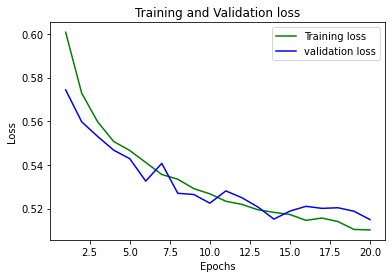

In [ ]:
#Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,21)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

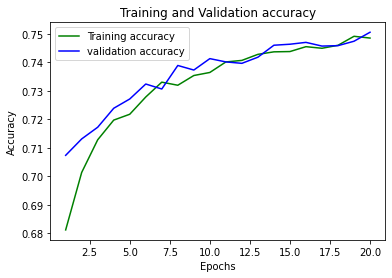

In [ ]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Model Testing

In [ ]:
#Load the model
model_path = "/content/drive/MyDrive/Deepfake/ResNet50v1_without_Droupout_3Dense_mprocessing"
model = keras.models.load_model(model_path)

In [ ]:
loss = model.evaluate(test_generator)

1250/1250 [==============================] - 56s 43ms/step - loss: 0.5041 - accuracy: 0.7552


In [ ]:
predictions = model.predict(test_generator)
print(predictions)
pred_labels = ((predictions > 0.5)+0).ravel() # (n_images,)
print(pred_labels.shape)
print(pred_labels)

1250/1250 [==============================] - 48s 38ms/step
[[0.15609457]
 [0.03697414]
 [0.14132501]
 ...
 [0.45370805]
 [0.85867816]
 [0.30667388]]
(20000,)
[0 0 0 ... 0 1 0]


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_recall_curve, classification_report, roc_curve, auc

#Get the confusion matrix & classification report
y_test = test_generator.classes

cnf_matrix = confusion_matrix(y_test, pred_labels)
report = classification_report(y_test, pred_labels)

print(cnf_matrix)
print(report)

[[8065 1935]
 [2960 7040]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10000
           1       0.78      0.70      0.74     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.75     20000
weighted avg       0.76      0.76      0.75     20000



In [ ]:
#Save the classification report in the drive
import json

target_labels = ['fake','real']

dict_report = classification_report(y_test, pred_labels, target_names=target_labels, output_dict=True)
print(dict_report)

dir = model_path
with open(dir+'/reports.txt', 'w') as filehandle:
    json.dump(dict_report, filehandle)

{'fake': {'precision': 0.7554447384490128, 'recall': 0.7423, 'f1-score': 0.7488146877837184, 'support': 10000}, 'real': {'precision': 0.746707293100059, 'recall': 0.7597, 'f1-score': 0.7531476157430357, 'support': 10000}, 'accuracy': 0.751, 'macro avg': {'precision': 0.751076015774536, 'recall': 0.751, 'f1-score': 0.7509811517633771, 'support': 20000}, 'weighted avg': {'precision': 0.7510760157745359, 'recall': 0.751, 'f1-score': 0.7509811517633771, 'support': 20000}}


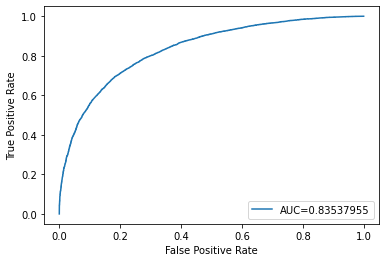

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Model Demo

In [ ]:
model_path = "/content/drive/MyDrive/Deepfake/ResNet50v1_without_Droupout_3Dense_mprocessing"
model = keras.models.load_model(model_path)

In [ ]:
from google.colab import files                    #To be able to upload files
#upload the image to test
print("Upload an image to know if its real or fake!!")
uploaded = files.upload()

Upload an image to know if its real or fake!!


Saving 00KEKJJ1Q4.jpg to 00KEKJJ1Q4 (1).jpg


1/1 [==============================] - 0s 73ms/step


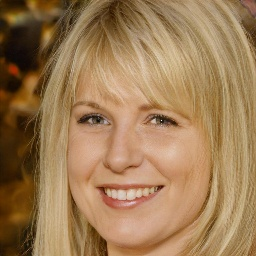



The image is fake.



In [ ]:
from IPython.display import Image, display
from keras.utils import load_img, img_to_array

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
# for i in range (1,17):
img_directory = list(uploaded.keys())[0]
img_data = load_img(img_directory, target_size = (64, 64))   #load the image from the directory
img_data = img_to_array(img_data)                            #convert the image to a Numpy array
img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.

classify = model.predict(img_data)
display(Image(img_directory,width= 150, height=150))
print("\n")
# print(classify)
if(int(classify[0][0]) > 0.5):
  print(TGREEN + "The image is real. \n")
else:
  print(TRED + "The image is fake.\n")